# KNN ensembling

The purpose of this notebook is to try various approaches to intelligently ensemble KNN with XGB/NN.

In [64]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [65]:
df = pd.read_csv('../data/Final Data/start_to_finish_with_preds.csv')

In [66]:
df.head()

,Y,M,home_team,away_team,home_elo,away_elo,home_avg,away_avg,home_obp,away_obp,...,team_WHIP_pct_diff,xgb_pred,knn_pred,knn_no_batting_pred,nn_pred,xgb_proba,knn_proba,knn_no_batting_proba,nn_proba,home_win
0,2016,4,PIT,SLN,1533.1644,1526.7958,0.252810,0.246971,0.317378,0.316181,...,-0.012113,0.0,0.0,0.0,1,0.452681,0.500000,0.500000,0.615994,1.0
1,2016,4,TBA,TOR,1508.5856,1543.1775,0.246346,0.260793,0.309376,0.332750,...,0.014688,0.0,0.0,0.0,0,0.377228,0.493333,0.500000,0.446586,0.0
2,2016,4,KCA,NYN,1542.5957,1524.7207,0.262548,0.239915,0.317525,0.307705,...,0.080079,1.0,0.0,0.0,1,0.629717,0.500000,0.500000,0.588885,1.0
3,2016,4,OAK,CHA,1488.3344,1489.9082,0.246621,0.244771,0.308523,0.302390,...,-0.016226,1.0,1.0,1.0,1,0.572504,0.533333,0.540000,0.503614,0.0
4,2016,4,ANA,CHN,1509.8676,1526.6748,0.240166,0.239208,0.301890,0.316835,...,0.089003,1.0,1.0,1.0,1,0.515874,0.506667,0.513333,0.609053,0.0


In [68]:
reverse_cols = ['team_ERA_pct_diff', 'pitcher_ERA_pct_diff', 'team_WHIP_pct_diff',
                'pitcher_WHIP_pct_diff', 'team_Rank_pct_diff', 'team_RA_pct_diff']
prediction_cols = ['xgb_pred', 'xgb_proba', 'knn_pred', 'knn_proba', 'nn_pred', 'nn_proba']
info_cols = ['home_team', 'away_team', 'home_win', 'Y', 'M']

pct_diff_cols = [c for c in df.columns if c.endswith('_pct_diff')]

for c in reverse_cols:
    if c not in pct_diff_cols:
        print(c)
    else:
        pct_diff_cols.remove(c)

In [69]:
home_win_df = df[df['home_win'] == 1]
home_loss_df = df[df['home_win'] == 0]

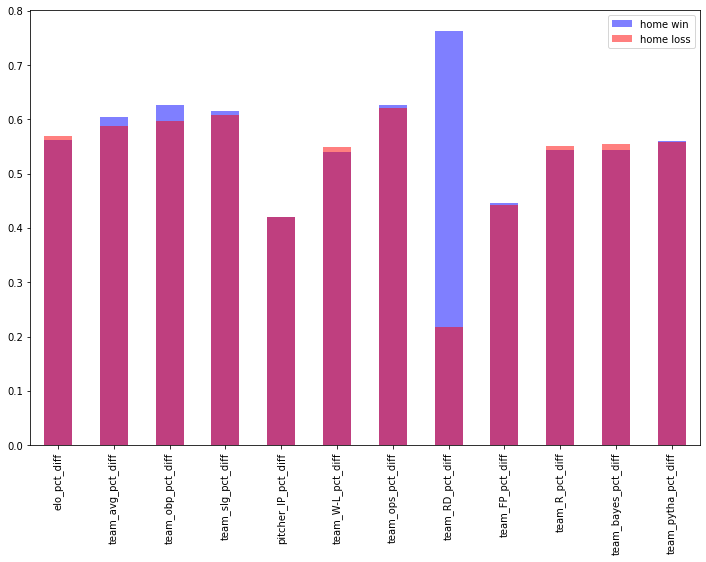

In [70]:
plt.figure(figsize=(12, 8))
(np.sum(home_win_df[pct_diff_cols] > 0, axis='rows') / home_win_df.shape[0]).plot(kind='bar', label='home win', color='blue', alpha=0.5)
(np.sum(home_loss_df[pct_diff_cols] < 0, axis='rows') / home_loss_df.shape[0]).plot(kind='bar', label='home loss', color='red', alpha=0.5)
plt.legend();

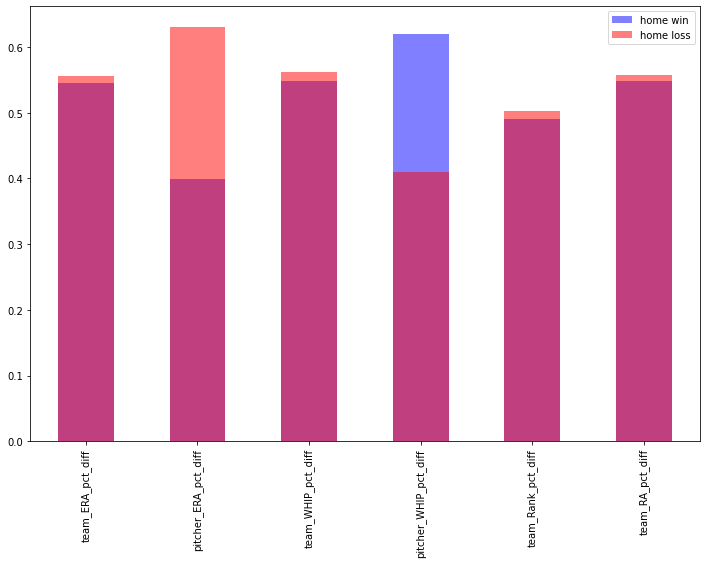

In [71]:
plt.figure(figsize=(12, 8))
(np.sum(home_win_df[reverse_cols] < 0, axis='rows') / home_win_df.shape[0]).plot(kind='bar', label='home win', color='blue', alpha=0.5)
(np.sum(home_loss_df[reverse_cols] > 0, axis='rows') / home_loss_df.shape[0]).plot(kind='bar', label='home loss', color='red', alpha=0.5)
plt.legend();